# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

*Note: AI translated my worked answers from paper into the LaTeX needed to properly render the math. I do not know LaTex but this allows for easy reading and grading. Better than photos of paper.

Part 1:
$$
\mathrm{SSE}=\sum_{i=1}^{N}\left(y_i - b_0 - b_1 z_{i1} - b_2 z_{i2}\right)^2
$$

Part 2:

$$
\mathrm{SSE}=\sum_{i=1}^{N}\left(y_i-b_0-b_1 z_{i1}-b_2 z_{i2}\right)^2
$$

**Partials**

$$
\frac{\partial \mathrm{SSE}}{\partial b_0}
=-2\sum_{i=1}^{N}\!\left(y_i-b_0-b_1 z_{i1}-b_2 z_{i2}\right)
$$

$$
\frac{\partial \mathrm{SSE}}{\partial b_1}
=-2\sum_{i=1}^{N} z_{i1}\!\left(y_i-b_0-b_1 z_{i1}-b_2 z_{i2}\right)
$$

$$
\frac{\partial \mathrm{SSE}}{\partial b_2}
=-2\sum_{i=1}^{N} z_{i2}\!\left(y_i-b_0-b_1 z_{i1}-b_2 z_{i2}\right)
$$

Part 3:

Let $e_i = y_i - b_0 - b_1 z_{i1} - b_2 z_{i2}$.

From the first-order conditions (Q2):

$$
\frac{\partial \mathrm{SSE}}{\partial b_0}=-2\sum_{i=1}^N e_i=0, \qquad
\frac{\partial \mathrm{SSE}}{\partial b_1}=-2\sum_{i=1}^N z_{i1} e_i=0, \qquad
\frac{\partial \mathrm{SSE}}{\partial b_2}=-2\sum_{i=1}^N z_{i2} e_i=0.
$$

Therefore (orthogonality conditions):

$$
\frac{1}{N}\sum_{i=1}^N e_i = 0 \quad \text{(average error is zero)}
$$

$$
\sum_{i=1}^N e_i z_{i1}=0, \qquad \sum_{i=1}^N e_i z_{i2}=0 \quad \text{(residuals orthogonal to each regressor)}
$$

Part 4:

From Q2,
$$
\frac{\partial \mathrm{SSE}}{\partial b_0}=-2\sum_{i=1}^N\!\big(y_i-b_0-b_1 z_{i1}-b_2 z_{i2}\big)=0
$$
so
$$
Nb_0=\sum_{i=1}^N y_i - b_1\sum_{i=1}^N z_{i1} - b_2\sum_{i=1}^N z_{i2}.
$$
Since the predictors are centered, $\sum_i z_{ij}=0$ for $j=1,2$, hence
$$
\boxed{\,b_0^{*}=\bar y\,}.
$$

Eliminate $b_0^*$ by centering $y$: let $\tilde y_i = y_i-\bar y$. Then minimizing SSE is equivalent to
$$
\min_{b_1,b_2}\ \sum_{i=1}^N \big(\tilde y_i - b_1 z_{i1} - b_2 z_{i2}\big)^2,
$$
i.e., a **no-intercept** regression of $\tilde y$ on $z_{1},z_{2}$.

The normal equations (in terms of $b_1,b_2$ only) are
$$
b_1\sum z_{i1}^2 + b_2\sum z_{i1}z_{i2}=\sum z_{i1}\tilde y_i,\qquad
b_1\sum z_{i1}z_{i2} + b_2\sum z_{i2}^2=\sum z_{i2}\tilde y_i,
$$
which are the same as using $y$ because $\sum z_{ij}=0$.

Part 5:

Let $\tilde y_i = y_i-\bar y$ and define the sums
$S_{11}=\sum_{i=1}^N z_{i1}^2,\; S_{22}=\sum_{i=1}^N z_{i2}^2,\; S_{12}=\sum_{i=1}^N z_{i1}z_{i2},\;
s_{1y}=\sum_{i=1}^N z_{i1}\tilde y_i,\; s_{2y}=\sum_{i=1}^N z_{i2}\tilde y_i.$

Then the normal equations can be written as
$$
A\,b=C,
\qquad
A=
\begin{bmatrix}
S_{11} & S_{12}\\
S_{12} & S_{22}
\end{bmatrix},\;\;
b=
\begin{bmatrix}
b_1\\[2pt] b_2
\end{bmatrix},\;\;
C=
\begin{bmatrix}
s_{1y}\\[2pt] s_{2y}
\end{bmatrix}.
$$

(Because $\sum_i z_{ij}=0$, $s_{jy}=\sum_i z_{ij}y_i$—using $y$ or $\tilde y$ is equivalent.)

Part 6:

Divide by $N$ and use $z_{ij}=x_{ij}-m_j$ with $m_j=\bar x_{\cdot j}$.

Define
$$
\Sigma_{xx}=
\begin{bmatrix}
\frac1N\sum (x_{i1}-m_1)^2 & \frac1N\sum (x_{i1}-m_1)(x_{i2}-m_2)\\
\frac1N\sum (x_{i1}-m_1)(x_{i2}-m_2) & \frac1N\sum (x_{i2}-m_2)^2
\end{bmatrix},
\qquad
\Sigma_{xy}=
\begin{bmatrix}
\frac1N\sum (x_{i1}-m_1)(y_i-\bar y)\\
\frac1N\sum (x_{i2}-m_2)(y_i-\bar y)
\end{bmatrix}.
$$

Matrix form:
$$
A\,b=C \;\Longrightarrow\; \Sigma_{xx}\!\begin{bmatrix}b_1\\ b_2\end{bmatrix}
=\Sigma_{xy}.
$$

So
$$
A=\Sigma_{xx}=
\begin{bmatrix}
\operatorname{Var}(x_1) & \operatorname{Cov}(x_1,x_2)\\
\operatorname{Cov}(x_1,x_2) & \operatorname{Var}(x_2)
\end{bmatrix},
\qquad
C=\Sigma_{xy}=
\begin{bmatrix}
\operatorname{Cov}(x_1,y)\\
\operatorname{Cov}(x_2,y)
\end{bmatrix}.
$$

Intuition:
$$
\begin{bmatrix}
\operatorname{Var}(x_1) & \operatorname{Cov}(x_1,x_2)\\
\operatorname{Cov}(x_1,x_2) & \operatorname{Var}(x_2)
\end{bmatrix}
\begin{bmatrix}b_1\\ b_2\end{bmatrix}
=
\begin{bmatrix}\operatorname{Cov}(x_1,y)\\ \operatorname{Cov}(x_2,y)\end{bmatrix}
\;\Rightarrow\;
\begin{bmatrix}b_1\\ b_2\end{bmatrix}
=\Sigma_{xx}^{-1}\Sigma_{xy}.
$$
OLS sets covariances between each regressor and the residual to zero and matches $y$ via covariances.


**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [ ]:
#Elelcted to Complete Q3

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [15]:
#Part 1 --------------------------------------------------------------------------------------------------------------------------------------------------------------
#import all necessary packages for the rest of cells
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load
df = pd.read_csv('heart_hw.csv')
df['y'] = df['y'].astype(int)
df['transplant'] = df['transplant'].str.strip().str.lower()

p_control = df.loc[df['transplant']=='control', 'y'].mean()
p_treat   = df.loc[df['transplant']=='treatment', 'y'].mean()
ate = p_treat - p_control

print(f"Control survival:   {p_control:.3f}") #AI helped with formatting
print(f"Treatment survival: {p_treat:.3f}")
print(f"Difference (ATE):   {ate:.3f}")

out = pd.DataFrame({
    'metric': ['control_survival','treatment_survival','difference (ATE)'],
    'value':  [p_control, p_treat, ate]
}).round(3)
out

Control survival:   0.118
Treatment survival: 0.348
Difference (ATE):   0.230


,metric,value
0,control_survival,0.118
1,treatment_survival,0.348
2,difference (ATE),0.230


In [18]:
#Part 2 --------------------------------------------------------------------------------------------------------------------------------------------------------------
# Load fresh and create the binary indicator robustly
df = pd.read_csv('heart_hw.csv')
df['y'] = df['y'].astype(int)
df['transplant'] = df['transplant'].astype(str).str.strip().str.lower()
df['treat'] = (df['transplant'] == 'treatment').astype(int)

# Sanity check
assert 'treat' in df.columns and set(df['treat'].unique()) <= {0,1}, "treat column not built correctly"

# OLS: y ~ 1 + treat
X = np.c_[np.ones(len(df)), df['treat'].to_numpy()]  # [const, treat]
y = df['y'].to_numpy()

beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
intercept, coef_treat = beta

# Compare to Part 1
p_control = df.loc[df['treat']==0, 'y'].mean()
p_treat   = df.loc[df['treat']==1, 'y'].mean()
ate = p_treat - p_control

print(f"Intercept (should equal control survival): {intercept:.3f} vs {p_control:.3f}")
print(f"Coef on treat (should equal ATE):          {coef_treat:.3f} vs {ate:.3f}")

#this is to explain the relationship clearly ---------------

#In a linear probability model with a binary treatment and an intercept, the intercept is the mean outcome in the control group, and the coefficient on treatment equals the difference in means between treatment and control.
#Beta-hat-0 equals the control survival rate (0.118), and beta-hat-1 equals the treatment minus control survival difference which is 0.230.
#The predicted survival for the treatment group is beta-hat-0 + beta-hat-1 = 0.348, which matches the treatment group’s survival proportion.

Intercept (should equal control survival): 0.118 vs 0.118
Coef on treat (should equal ATE):          0.230 vs 0.230


In [19]:

# --- OLS by closed-form: y ~ 1 + treat + age ---
X = np.c_[np.ones(len(df)), df[['treat','age']].to_numpy()]   # [const, treat, age]
y = df['y'].to_numpy()
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
const, b_treat, b_age = beta

print("Linear probability model: y = const + b_treat*treat + b_age*age")
print(f"const (intercept): {const:.3f}")
print(f"b_treat:           {b_treat:.3f}")
print(f"b_age:             {b_age:.3f}")

# For reference from Part (1)/(2)
p_control = df.loc[df['treat']==0, 'y'].mean()       # control survival rate
age_min, age_max, age_bar = df['age'].min(), df['age'].max(), df['age'].mean()


print("Model: y = const + b_treat * treat + b_age * age")
print(f"const (intercept)     : {const:.3f}")
print(f"b_treat (age-adjusted): {b_treat:.3f}")
print(f"b_age (per year)      : {b_age:.3f}")
print()

#Make the intercept meaningful by centering age at its mean: googled to help with this part
Xc = np.c_[np.ones(len(df)), df['treat'].to_numpy(), (df['age'] - age_bar).to_numpy()]
betac = np.linalg.inv(Xc.T @ Xc) @ (Xc.T @ y)
const_c, b_treat_c, b_age_c = betac

print(f"Age range = [{age_min:.1f}, {age_max:.1f}], mean(age) = {age_bar:.2f}")
print("Same model with age centered at mean(age): age_c = age - mean(age)")
print(f"const_c (control at avg age): {const_c:.3f}")
print(f"b_treat_c (effect, adj. age): {b_treat_c:.3f}")
print(f"b_age_c  (per year)         : {b_age_c:.3f}")
print()

#Show how intercept changed vs Part (2)
print("How the intercept changed:")
print(f"- Part (2) intercept (control mean): {p_control:.3f}")
print(f"- Part (3) intercept (age=0 control): {const:.3f}")
print("  (Because age is in the model, the raw intercept is the predicted control survival at age = 0.)")
print(f"- If we center age, intercept becomes control at average age: {const_c:.3f}")

#Explain the interecept change ---------------------

#When age is included, the intercept is the predicted survival for a control patient at age = 0, so it jumps to 0.702 and is not directly comparable to the Part-2 intercept.
#If age is centered at its mean of ~44.64, the intercept becomes the predicted survival for an average-age control of about ~0.095.

Linear probability model: y = const + b_treat*treat + b_age*age
const (intercept): 0.702
b_treat:           0.265
b_age:             -0.014
Model: y = const + b_treat * treat + b_age * age
const (intercept)     : 0.702
b_treat (age-adjusted): 0.265
b_age (per year)      : -0.014

Age range = [8.0, 64.0], mean(age) = 44.64
Same model with age centered at mean(age): age_c = age - mean(age)
const_c (control at avg age): 0.095
b_treat_c (effect, adj. age): 0.265
b_age_c  (per year)         : -0.014

How the intercept changed:
- Part (2) intercept (control mean): 0.118
- Part (3) intercept (age=0 control): 0.702
  (Because age is in the model, the raw intercept is the predicted control survival at age = 0.)
- If we center age, intercept becomes control at average age: 0.095


best_degree=2, RMSE_train=0.387, RMSE_test=0.465


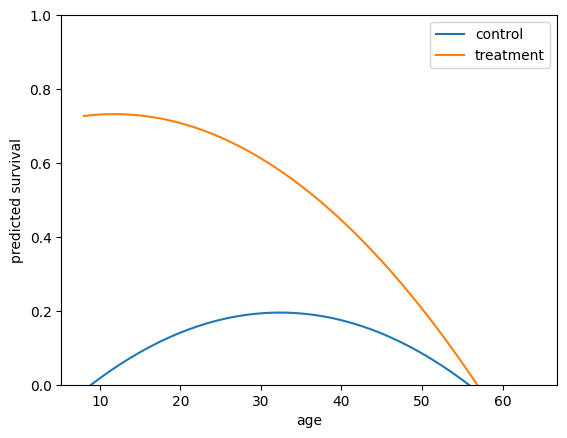

In [13]:
#Part 4 --------------------------------------------------------------------------------------------------------------------------------------------------------------
y    = df['y'].astype(int).to_numpy()
age  = df['age'].to_numpy()
treat= (df['transplant'].str.strip().str.lower()=='treatment').astype(int).to_numpy()

# Flexible model: non-linear age (polynomial) + treatment interactions
# Train/test split, choose degree by test RMSE, plot predicted survival by age
def Xmat(a,t,d):
    cols=[np.ones_like(a), t.astype(float)]
    for k in range(1,d+1):
        ak=a.astype(float)**k
        cols += [ak, t.astype(float)*ak]
    return np.column_stack(cols)               #used AI help to make defintion as this was hard

# Split once (stratify by treatment to preserve balance)
_, X0, y0, a0, t0 = None, Xmat(age,treat,1), y, age, treat
Xtr, Xte, ytr, yte, atr, ate, ttr, tte = train_test_split(X0, y0, a0, t0, test_size=0.2,
                                                          random_state=42, stratify=treat)

best=None
for d in (1,2,3):
    lm=LinearRegression(fit_intercept=False).fit(Xmat(atr,ttr,d), ytr)
    rtr=sqrt(mean_squared_error(ytr, lm.predict(Xmat(atr,ttr,d))))
    rte=sqrt(mean_squared_error(yte, lm.predict(Xmat(ate,tte,d))))
    best=min(best, (rte,d,lm,rtr), key=lambda x:x[0]) if best else (rte,d,lm,rtr)

rte,d,lm,rtr = best
print(f"best_degree={d}, RMSE_train={rtr:.3f}, RMSE_test={rte:.3f}")

# Plot predicted survival vs age for control and treatment using best model
g = np.linspace(age.min(), age.max(), 200)
def p(t): return lm.predict(Xmat(g, np.full_like(g,t), d))
plt.plot(g, p(0), label='control'); plt.plot(g, p(1), label='treatment')
plt.ylim(0,1); plt.xlabel('age'); plt.ylabel('predicted survival'); plt.legend(); plt.show()

#Describing what I see ------------------------------

#Predicted survival is higher for transplant than control at nearly all ages.
#Survival is non-linear in age, it rises through young adulthood, peaks around the late 20s to early 30s, then declines with age.
#The transplant minus control gap is largest near that peak and shrinks at older ages as both groups’ probabilities fall.
#This indicates heterogeneous treatment effects, the transplant benefit is strongest for younger to mid-adult patients and attenuates for older patients.
#Using an 80/20 train-test split, the best model used a quadratic age specification with test RMSE about 0.465.


Part 5:

A transplant selection model must address bias and fairness, since the training data are not randomized and may reflect differences in access or care we should test performance and calibration across subgroups and correct any disparate impact. The target label and predictors must avoid proxies for sensitive traits and be clinically relevant. The model should be interpretable to clinicians with clear feature contributions and documentation of limits. Before deployment we need external validation and we must set decision thresholds that align with ethical medical policy rather than pure accuracy. In use the tool should support clinician judgment, with an appeals path for contested decisions. We must monitor calibration, performance, and data drift over time under formal supervision with versioning and audits. Finally, data privacy and security must meet HIPAA standards (as this is federal law), with strong encryption and restriction on use from others.